
Задачи

    Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
    Какой клиент совершил больше всего успешных операций? (success == True)
    С какой платформы осуществляется наибольшее количество успешных операций?
    Какую платформу предпочитают премиальные клиенты?
    Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
    Постройте график распределения числа успешных операций
    Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

 
Описание данных

user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиальным
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех – 1, нет – 0)
    platform – платформа
    time – время в формате Unix



In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [125]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep=',')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep=',')

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?


In [126]:
logs['date'] = pd.to_datetime(logs['time'], unit = 's')
print(logs.columns)
print(logs.shape)
print(logs.dtypes)


Index(['client', 'success', 'platform', 'time', 'date'], dtype='object')
(4500, 5)
client               int64
success               bool
platform            object
time                 int64
date        datetime64[ns]
dtype: object


In [127]:
logs.head()

,client,success,platform,time,date
0,40177,True,phone,1585412212,2020-03-28 16:16:52
1,61468,True,phone,1585425658,2020-03-28 20:00:58
2,35604,False,phone,1585459894,2020-03-29 05:31:34
3,9961,True,phone,1585400189,2020-03-28 12:56:29
4,10931,True,computer,1585468629,2020-03-29 07:57:09


In [128]:
print(user_data.columns)
print(user_data.shape)
print(user_data.dtypes)

Index(['client', 'premium', 'age'], dtype='object')
(2954, 3)
client     int64
premium     bool
age        int64
dtype: object


In [129]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

Топ клиентов, использующих телефон

In [130]:
logs[logs.platform == 'phone'].groupby('client').agg({'time': 'count'}).sort_values('time', ascending = False)[:5]

,time
client,
61473,33
36165,30
78349,29
64064,28
28719,28


Что используют те, кто не используют телефон, какой у них самый популярный раздел

In [131]:
nousephone = logs.groupby(['client', 'platform'], as_index = False) \
    .agg({'time': 'count'}) \
    .pivot(index = 'client', values = 'time', columns = 'platform').fillna(0) 
nousephone.query('phone == 0').sum()

platform
computer    1345.0
phone          0.0
tablet       219.0
dtype: float64

Кто дольше всего пользуется продуктом?

In [136]:
df = logs.groupby('client', as_index = False).agg({'date': ['max', 'min']})

df['timeofusage'] = df[('date', 'max')] - df[('date', 'min')]
df.sort_values('timeofusage', ascending = False)[:10]

client                date                         timeofusage
                            max                 min                
3712  92584 2020-03-29 11:04:58 2020-03-28 13:06:47 0 days 21:58:11
1426  36165 2020-03-29 10:54:19 2020-03-28 12:57:28 0 days 21:56:51
2095  52870 2020-03-29 10:41:58 2020-03-28 12:57:50 0 days 21:44:08
1120  28719 2020-03-29 10:26:22 2020-03-28 12:53:22 0 days 21:33:00
3141  78349 2020-03-29 10:34:13 2020-03-28 13:11:37 0 days 21:22:36
3300  82563 2020-03-29 10:20:31 2020-03-28 13:18:03 0 days 21:02:28
468   12179 2020-03-29 11:02:19 2020-03-28 14:01:26 0 days 21:00:53
2469  61473 2020-03-29 10:33:12 2020-03-28 13:51:38 0 days 20:41:34
2468  61468 2020-03-29 10:33:56 2020-03-28 14:05:25 0 days 20:28:31
2562  64064 2020-03-29 09:42:30 2020-03-28 13:46:49 0 days 19:55:41

Построить график зависимости использования

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [33]:
top = logs.query('success == True').groupby(['client']).agg({'success': 'count'}).sort_values(by = 'success', ascending=False)[:9].reset_index().sort_values(by = 'client', ascending=True)

list(top.client)


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы было совершено наибольшее количество успешных операций?

In [34]:
logs.query('success == True').groupby(['platform']).agg({'success': 'count'}).sort_values(by = 'success', ascending=False)

,success
platform,
phone,2019
computer,1090
tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [35]:
joins = logs.merge(user_data, on = 'client')

In [36]:
joins.query('premium == True').groupby(['platform']).agg({'client': 'count'}).sort_values(by = 'client', ascending=False)

,client
platform,
phone,246
computer,150
tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

In [37]:
age_dist_premium = user_data.query('premium == True').age.value_counts(normalize = True).reset_index().rename(columns={'index': 'age', 'age': 'percentage'}).sort_values(by='age', ascending=True)
age_dist_no_premium = user_data.query('premium == False').age.value_counts(normalize = True).reset_index().rename(columns={'index': 'age', 'age': 'percentage'}).sort_values(by='age', ascending=True)


In [38]:
age_dist = user_data.groupby(['premium','age']).value_counts(normalize = True).reset_index().drop(columns = 'client', axis =  1).rename(columns={0: 'percentage'})
age_dist['prem'] = age_dist.premium == True


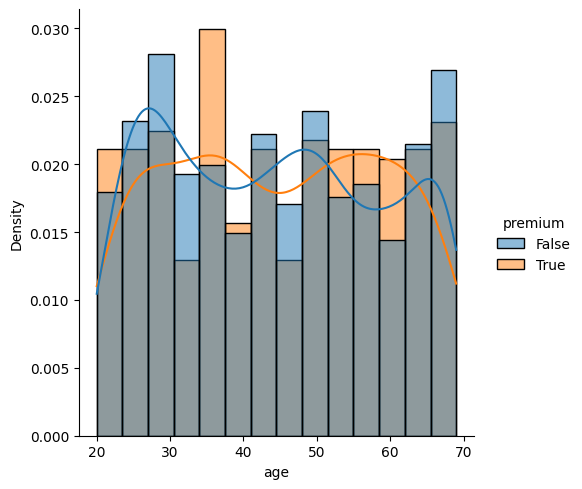

In [39]:
sns.displot(data = joins, x = 'age', hue = 'premium', kde = True, kind = 'hist', stat = 'density', common_norm = False, bins = 14)


Постройте график распределения числа успешных операций: 

    x – число успешных операций
    y – число клиентов, совершивших такое количество успешных операций


In [40]:
success_count = logs.query('success == True').client.value_counts()

In [41]:
success_count = logs.loc[logs.success == True].client.value_counts().rename('successes')

In [42]:
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successes, Length: 2845, dtype: int64

<Axes: xlabel='successes', ylabel='count'>

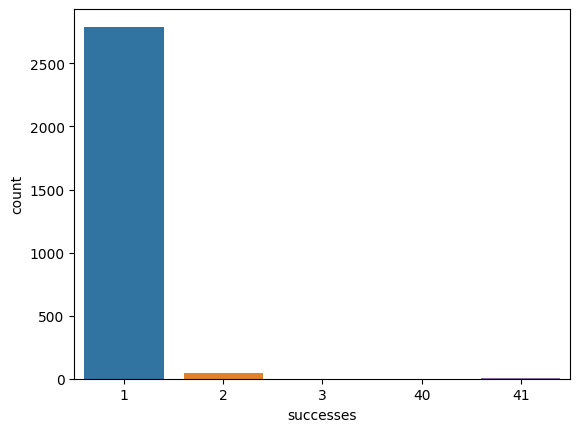

In [43]:
sns.countplot(x = success_count)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

    sns.countplot – документация к типу графика
    figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

<Axes: xlabel='age', ylabel='count'>

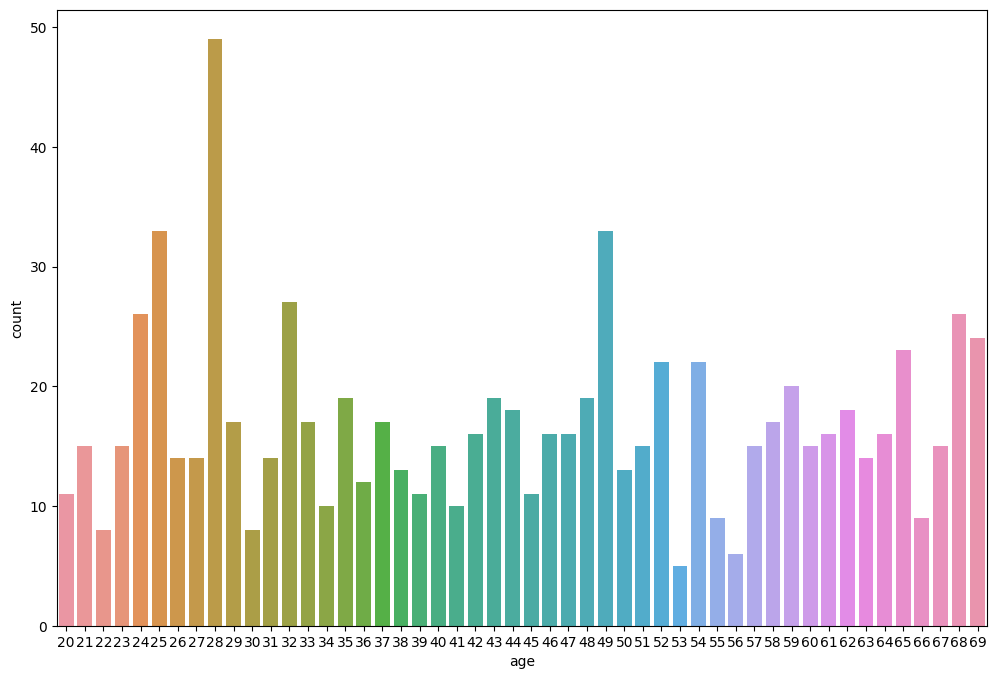

In [76]:
plt.figure(figsize=(12, 8))
sns.countplot(data = joins.loc[(joins.platform == 'computer')&(joins.success == True)], x = 'age')

In [70]:
comp_success = joins.query('success == True & platform == "computer"').groupby('age').agg({'age': 'count'}).rename(columns = {'age': 'successes'}).reset_index()
comp_success

,age,successes
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


<Axes: xlabel='age', ylabel='successes'>

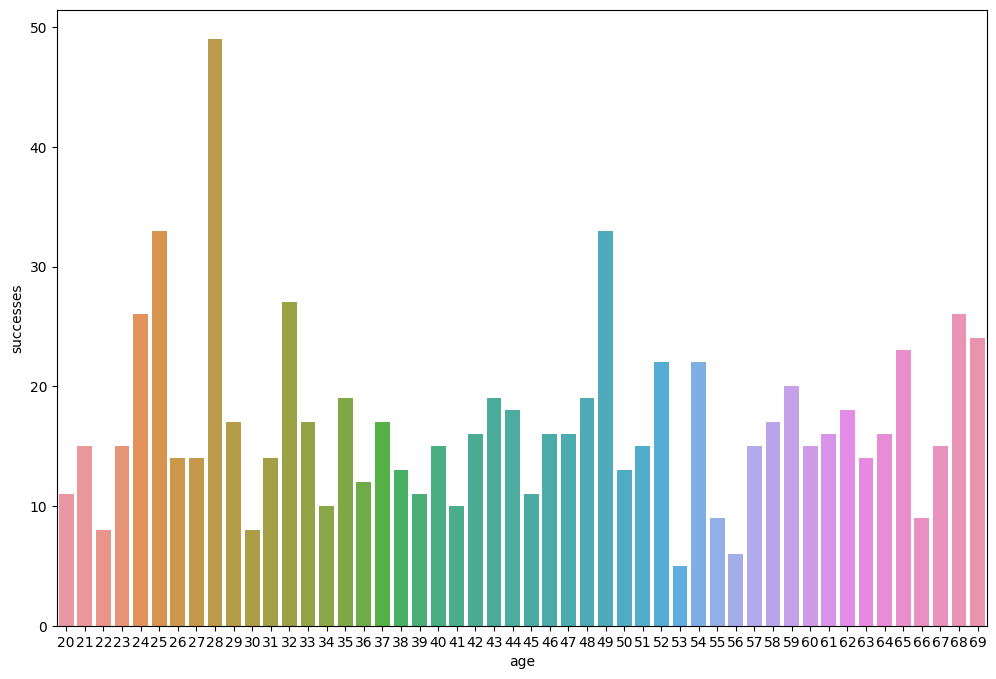

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data = comp_success, x='age', y = 'successes')